<a href="https://colab.research.google.com/github/KelianF/MachineLearning/blob/master/Supervised/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of Linear Regression
## Imports

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

## Set up data and display it

Text(0, 0.5, 'y')

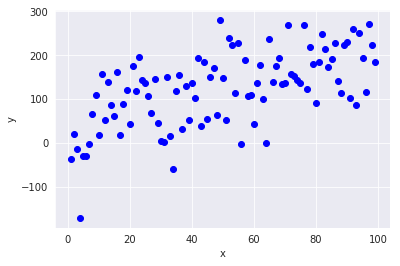

In [29]:
#Defining the x array. 
x=np.array(range(1,100)) 
x=x[:, np.newaxis]

#Defining the y array. 
y=10+2*x.ravel() 
y=y+np.random.normal(loc=0, scale=70, size=99)
y=y[:,np.newaxis]

plt.scatter(x,y, color='blue')
plt.xlabel('x') 
plt.ylabel('y')


# Using Scikit-Learn
## Imports


In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
Reg = LinearRegression()
Reg.fit(x,y)
y_hat=Reg.predict(x)


In [32]:
print('Intercept is: ' + str(round(Reg.intercept_[0],2)))
print('Coef is/are: ' + str(Reg.coef_))

print('R2 is: ' + str(round(Reg.score(x,y),2))) 


Intercept is: 33.94
Coef is/are: [[1.79235056]]
R2 is: 0.36


## Graphical representation

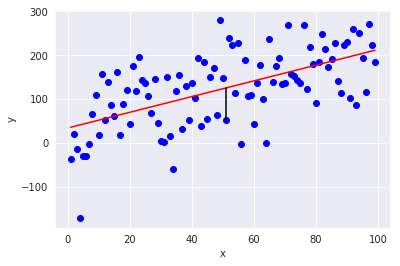

In [34]:
plt.scatter(x,y, color='blue')
plt.plot(x,y_hat, color='red')
plt.plot((x[50],x[50]) ,(y[50], y_hat[50]), color='black')
plt.xlabel('x') 
plt.ylabel('y')
plt.show()

This Graphical representation, shows the data and our model. 

I have added a line representing the difference between our model and the actual data, in econometrics, this is called ε. 

Hence, a regression is a minimisation problem of the sum of all the ε squared.


Furthermore, the regression performed here is of the form Y on X, which explais why the ε is parallel to the Y axis. If the opposite was computed, the ε looked at for minimization would've been parallel to the X axis.